In [46]:
from PIL import Image
import numpy as np
import zarr
from matplotlib import pyplot as plt
import torch


%load_ext autoreload
%autoreload 2

# Models

Here we will test various models to understand which is better to use

## Load Image

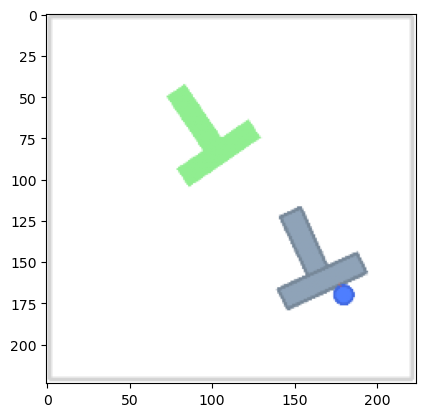

In [38]:
dataset = zarr.open("../data/demonstrations_snapshot_1.zarr", mode="r")

image = dataset["data"]["img"][33:37] # [224, 224, 3] with values in range [0-255]

plt.imshow(image[0]/ 255)

## Clip Visual Transformer

In [39]:
from transformers import CLIPProcessor, CLIPModel

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

inputs = clip_processor(images=image, return_tensors="pt", padding=True)

In [40]:
with torch.no_grad():
    image_features = clip_model.get_image_features(**inputs)

image_features = image_features.detach().cpu().numpy()

image_features.shape

(4, 512)

In [41]:
clip_model.config.projection_dim

512

In [49]:
from robotics.model_src.visual_encoder import CLIPVisualEncoder

model = CLIPVisualEncoder()

In [50]:
embeddings = model.encode(image)

33


In [1]:
import h5py

data_path = "../robomimic/datasets/tool_hang/ph/image.hdf5"

f = h5py.File(data_path, "r")

data = f["data"]

In [2]:
demo = data["demo_1"]

In [8]:
imgs = demo["obs"]["agentview_image"][:]

In [9]:
import imageio

video_path = "test_robot_see.mp4"
fps = 24

with imageio.get_writer(video_path, fps=fps, codec="libx264") as writer:
    for frame in imgs:
        writer.append_data(frame)

print(f"Saved video to {video_path}")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (124, 124) to (128, 128) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Saved video to test_robot_see.mp4


In [10]:
import numpy as np
import torch
%env OPENBLAS_NUM_THREADS=8
%env OMP_NUM_THREADS=8

%load_ext autoreload
%autoreload 2
import h5py

data_path = "../robomimic/datasets/tool_hang/ph/image_agent.hdf5"

f = h5py.File(data_path, "r")

data = f["data"]
from robotics.model_src.dataset import RobosuiteImageActionDataset, RobosuiteImageActionDatasetMem, normalize_data

camera_type = "agentview"

pred_horizon = 8
obs_horizon = 1

ds = RobosuiteImageActionDataset(data_path, camera_type, obs_horizon=obs_horizon, pred_horizon=pred_horizon)

env: OPENBLAS_NUM_THREADS=8
env: OMP_NUM_THREADS=8


100%|██████████| 200/200 [00:00<00:00, 370.78it/s]


MemoryError: Unable to allocate 53.8 GiB for an array with shape (95962, 224, 224, 3) and data type float32